<a href="https://colab.research.google.com/github/anshudhanshu/ICC-Data-Analysis1/blob/main/Sudhanshu_Rawat_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. Plot the run worm graph of any one match.</b>

<br>




# <b><center> Sample Run Worm Graph </center></b>

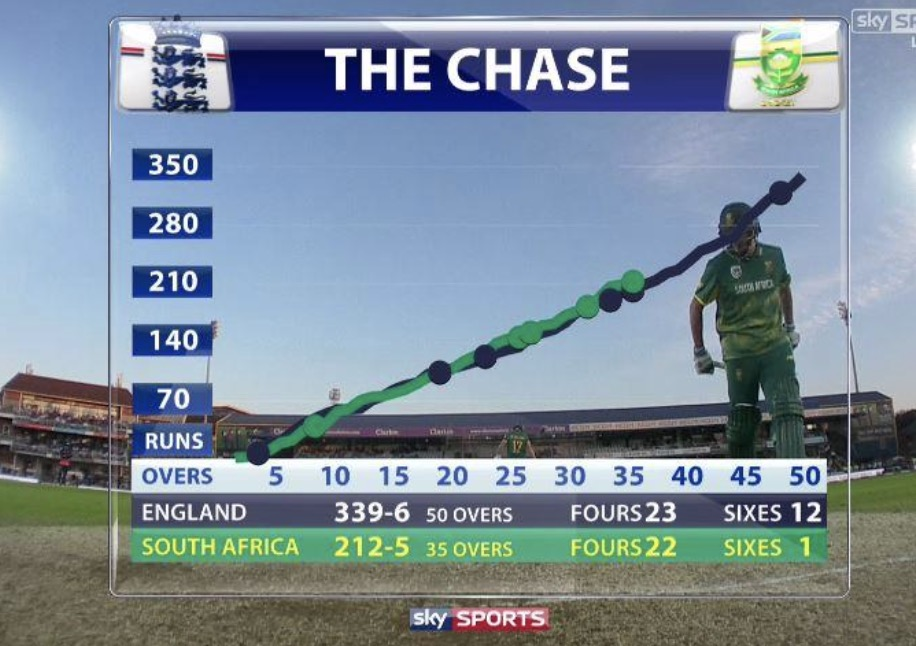

In [1]:
#Import package
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 1/Week 4/Day 6/dat/'
df = pd.read_csv(working_directory + 'Copy of International_T20_Data.csv')

In [6]:
df.head()

innings  ...  info.outcome.bowl_out
0  [{'1st innings': {'team': 'Australia', 'delive...  ...                    NaN
1  [{'1st innings': {'team': 'Australia', 'delive...  ...                    NaN
2  [{'1st innings': {'team': 'Australia', 'delive...  ...                    NaN
3  [{'1st innings': {'team': 'Hong Kong', 'delive...  ...                    NaN
4  [{'1st innings': {'team': 'Zimbabwe', 'deliver...  ...                    NaN

[5 rows x 27 columns]

In [12]:
first_inning = eval(df['innings'][0])[0]
second_inning = eval(df['innings'][0])[1]

In [15]:
type(first_inning['1st innings'])

dict

In [16]:
first_inning.keys()

dict_keys(['1st innings'])

In [17]:
first_inning['1st innings'].keys()

dict_keys(['team', 'deliveries'])

In [20]:
len(first_inning['1st innings']['deliveries'])

125

In [77]:
first_innings_deliveris = first_inning['1st innings']['deliveries']
second_innings_deliveris = second_inning['2nd innings']['deliveries']

In [79]:
def get_innings_score(innings_deliveris):
  innings_deliveris_df = pd.DataFrame(columns=['delivery_number','runs_scored'])
  for delivery in innings_deliveris:
    delivery_number = list(delivery.keys())[0]
    extras = delivery[delivery_number]['runs']['extras']
    total = delivery[delivery_number]['runs']['total']
    innings_deliveris_df = innings_deliveris_df.append({'delivery_number':delivery_number,'runs_scored':total},ignore_index = True)
  innings_deliveris_df['over'] = innings_deliveris_df['delivery_number'].apply(lambda x: int(x)+1)
  innings_deliveris_run_df=innings_deliveris_df[['runs_scored','over']].groupby('over').sum().reset_index()
  innings_deliveris_run_df['total_score'] = first_innings_deliveris_run_df['runs_scored'].cumsum()
  return innings_deliveris_run_df

In [80]:
first_innings_deliveris_run_df = get_innings_score(first_innings_deliveris)
second_innings_deliveris_run_df = get_innings_score(second_innings_deliveris)

In [83]:
first_innings_deliveris_run_df['innings'] = 'first'
second_innings_deliveris_run_df['innings'] = 'second'

In [84]:
first_innings_deliveris_run_df['teams'] = first_inning['1st innings']['team']
second_innings_deliveris_run_df['teams'] = second_inning['2nd innings']['team']

In [85]:
match_score = pd.concat([first_innings_deliveris_run_df,second_innings_deliveris_run_df])

In [86]:
match_score.head()

over  runs_scored  total_score innings      teams
0     1          6.0          6.0   first  Australia
1     2          7.0         13.0   first  Australia
2     3          6.0         19.0   first  Australia
3     4          8.0         27.0   first  Australia
4     5         16.0         43.0   first  Australia

In [89]:
match_score.tail()

over  runs_scored  total_score innings      teams
15    16         13.0        129.0  second  Sri Lanka
16    17         11.0        139.0  second  Sri Lanka
17    18          6.0        148.0  second  Sri Lanka
18    19          6.0        154.0  second  Sri Lanka
19    20          9.0        168.0  second  Sri Lanka

In [81]:
import seaborn as sns


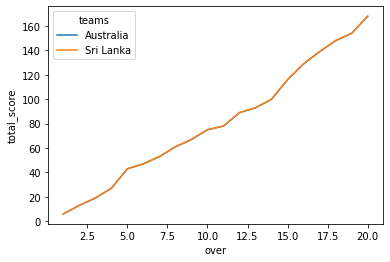

In [90]:
sns.lineplot(x='over',y='total_score',data=match_score,style='teams',hue='teams',dashes=False)